# Terry Traffic Stops Analysis: Phase 3 Project

* Student name:  STEPHEN KIMITI
* Student pace:  PART TIME
* Instructor name: ASHA DEEN

# INTRODUCTION

![example](images/arrest.jpg)

In Terry v. Ohio, a landmark Supreme Court case in 1967-8, the court found that a police officer was not in violation of the "unreasonable search and seizure" clause of the Fourth Amendment, even though he stopped and frisked a couple of suspects only because their behavior was suspicious. Thus was born the notion of "reasonable suspicion", according to which an agent of the police may e.g. temporarily detain a person, even in the absence of clearer evidence that would be required for full-blown arrests etc. 

There always will be officers who aspire to make a difference in their community by being proactive in their policing rather than just reactive. They come to appreciate that palpable feeling of accomplishment knowing their personal vigilance prevented a homicide, rape or robbery. Outstanding police work is the result of proper utilization of the valuable crime-fighting tool known as the Terry stop. 

The public often confuses the Terry stop with "stop and frisk." It behooves law enforcement to be ready to answer the question "What is a Terry stop?" and explain to their communities it originated from the landmark United States Supreme Court Case Terry v. Ohio in which SCOTUS laid out the guidelines to be followed by police officers for making a legal investigative stop.

Terry Stops are stops made of suspicious drivers.

# BUSINESS UNDERSTANDING

Officer, Am I Free to Go?

Video after video on the internet show officers not making a decision when asked by a citizen if they are free to go. There are only two answers “yes” or “no” and the answer is based on your evaluation of the known circumstances at the time of the stop. Why are officers unsure of the answer?

In this project we seek to build a classifier to predict whether an arrest was made after a Terry Stop, given information about the presence of weapons, the time of day of the call, etc. This is a binary classification problem.

Our dataset also includes information about gender and race which we used. We will inquire into whether race (of officer or of subject) plays a role in whether or not an arrest is made.

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.tree import plot_tree


In [3]:
#Loading data
df = pd.read_csv('Terry_Stops_20231016.csv', low_memory=False)

df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,26 - 35,-1,20150000348310,89624,Offense Report,None,7718,1976,M,White,...,16:20:00.0000000,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),"--DV - ARGUMENTS, DISTURBANCE (NO ARREST)",911,NORTH PCT 2ND W - BOY (JOHN) - PLATOON 1,N,N,North,B,B3
1,18 - 25,-1,20180000449803,508422,Arrest,None,7731,1988,M,White,...,19:23:00.0000000,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),--DV - DOMESTIC VIOLENCE (ARREST DISCRETIONARY),911,NORTH PCT 2ND W - L/U RELIEF,N,N,North,U,U2
2,18 - 25,-1,20170000400777,397838,Arrest,Lethal Cutting Instrument,6953,1968,M,White,...,19:38:00.0000000,-,-,-,NORTH PCT 2ND W - NORA (JOHN) - PLATOON 1,N,Y,West,Q,Q2
3,36 - 45,-1,20190000000373,526378,Field Contact,None,6088,1965,F,White,...,10:08:00.0000000,-,-,-,NORTH PCT OPS - CPT,N,N,-,-,-
4,36 - 45,-1,20180000414464,499714,Offense Report,None,6076,1959,M,White,...,14:43:00.0000000,TRESPASS,--PROWLER - TRESPASS,"TELEPHONE OTHER, NOT 911",WEST PCT 2ND W - QUEEN - PLATOON 1,N,N,West,Q,Q1


# EDA

In [4]:
# dataframe shape 

df.shape

(57674, 23)

In [5]:
# column names
df.columns

Index(['Subject Age Group', 'Subject ID', 'GO / SC Num', 'Terry Stop ID',
       'Stop Resolution', 'Weapon Type', 'Officer ID', 'Officer YOB',
       'Officer Gender', 'Officer Race', 'Subject Perceived Race',
       'Subject Perceived Gender', 'Reported Date', 'Reported Time',
       'Initial Call Type', 'Final Call Type', 'Call Type', 'Officer Squad',
       'Arrest Flag', 'Frisk Flag', 'Precinct', 'Sector', 'Beat'],
      dtype='object')

In [6]:
# info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57674 entries, 0 to 57673
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         57674 non-null  object
 1   Subject ID                57674 non-null  int64 
 2   GO / SC Num               57674 non-null  int64 
 3   Terry Stop ID             57674 non-null  int64 
 4   Stop Resolution           57674 non-null  object
 5   Weapon Type               57674 non-null  object
 6   Officer ID                57674 non-null  object
 7   Officer YOB               57674 non-null  int64 
 8   Officer Gender            57674 non-null  object
 9   Officer Race              57674 non-null  object
 10  Subject Perceived Race    57674 non-null  object
 11  Subject Perceived Gender  57674 non-null  object
 12  Reported Date             57674 non-null  object
 13  Reported Time             57674 non-null  object
 14  Initial Call Type     

In [7]:
#check statistical summery of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Subject ID,57674.0,5.802121e+09,1.019027e+10,-8.0,-1.000000e+00,-1.000000e+00,7.738339e+09,5.258248e+10
GO / SC Num,57674.0,2.018371e+13,8.727344e+10,-1.0,2.016000e+13,2.018000e+13,2.020000e+13,2.023000e+13
Terry Stop ID,57674.0,9.682452e+09,1.455971e+10,28020.0,2.252785e+05,4.862200e+05,1.385297e+10,5.258269e+10
Officer YOB,57674.0,1.983775e+03,9.483845e+00,1900.0,1.979000e+03,1.986000e+03,1.991000e+03,2.001000e+03


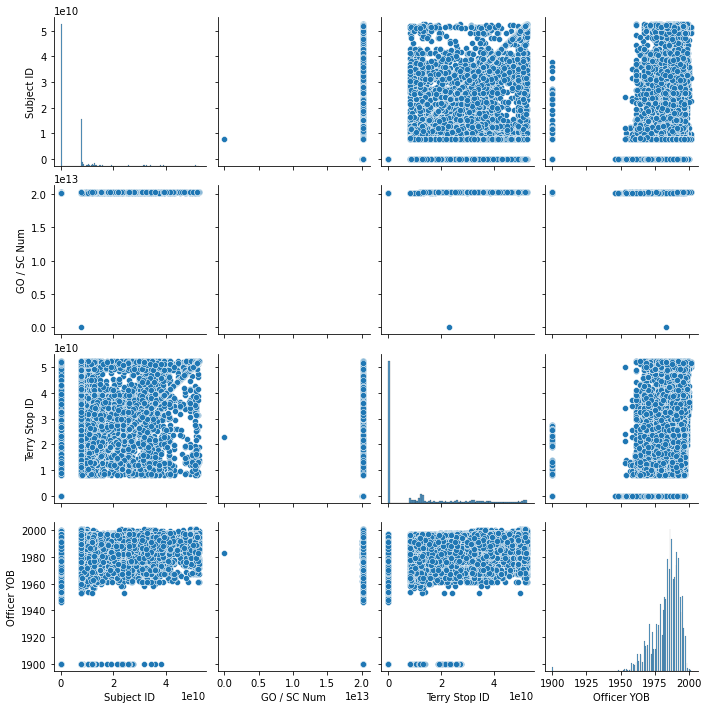

In [8]:
sns.pairplot(data=df.iloc[:,:-1])

# Data Preprocessing

We'll drop some columns.

We'll also need to preprocess the data by handling categorical variables (e.g., 'Weapon Type,' 'Officer Gender,' 'Officer Race,' 'Subject Perceived Race,' 'Subject Perceived Gender'), and converting them into numerical representations. You can use techniques like one-hot encoding for this purpose.

In [9]:
# create model inputs
columns_to_drop = ['Terry Stop ID', 'GO / SC Num', 'Officer Squad', 'Sector', 'Beat','Subject Age Group', 'Call Type', 'Reported Date', 'Precinct', 'Officer ID', 'Stop Resolution', 'Officer YOB','Initial Call Type', 'Final Call Type']
df = df.drop(columns=columns_to_drop, axis=1)
df.head()


,Subject ID,Weapon Type,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Time,Arrest Flag,Frisk Flag
0,-1,None,M,White,White,Female,16:20:00.0000000,N,N
1,-1,None,M,White,Black or African American,Male,19:23:00.0000000,N,N
2,-1,Lethal Cutting Instrument,M,White,Black or African American,Male,19:38:00.0000000,N,Y
3,-1,None,F,White,White,Male,10:08:00.0000000,N,N
4,-1,None,M,White,White,Female,14:43:00.0000000,N,N


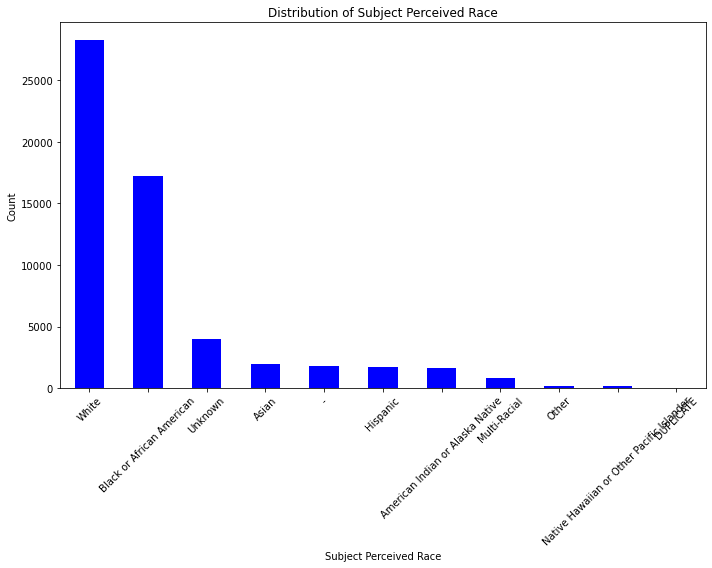

In [10]:
# Count the occurrences of each race category
race_counts = df["Subject Perceived Race"].value_counts()

# Create a bar graph
plt.figure(figsize=(10, 8))
race_counts.plot(kind='bar', color='blue')
plt.xlabel("Subject Perceived Race")
plt.ylabel("Count")
plt.title("Distribution of Subject Perceived Race")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()

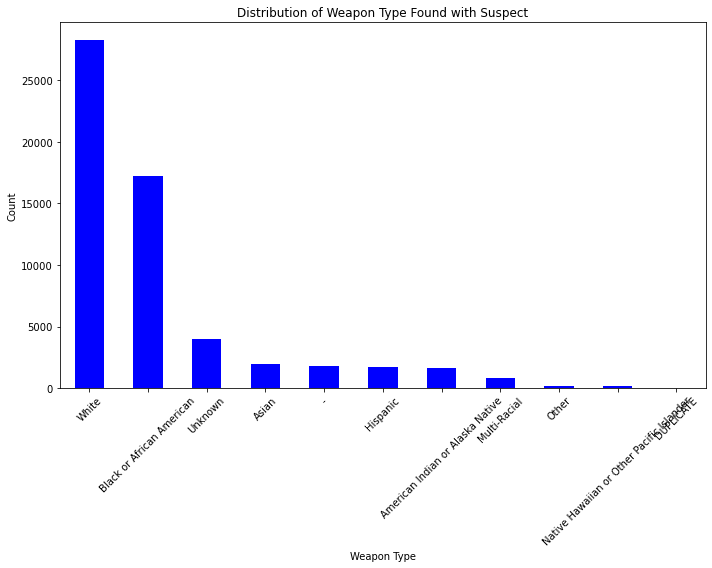

In [47]:
# Count the occurrences of each weapon category
weapons_counts = df["Weapon Type"].value_counts()

# Create a bar graph
plt.figure(figsize=(10, 8))
race_counts.plot(kind='bar', color='blue')
plt.xlabel("Weapon Type")
plt.ylabel("Count")
plt.title("Distribution of Weapon Type Found with Suspect")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()

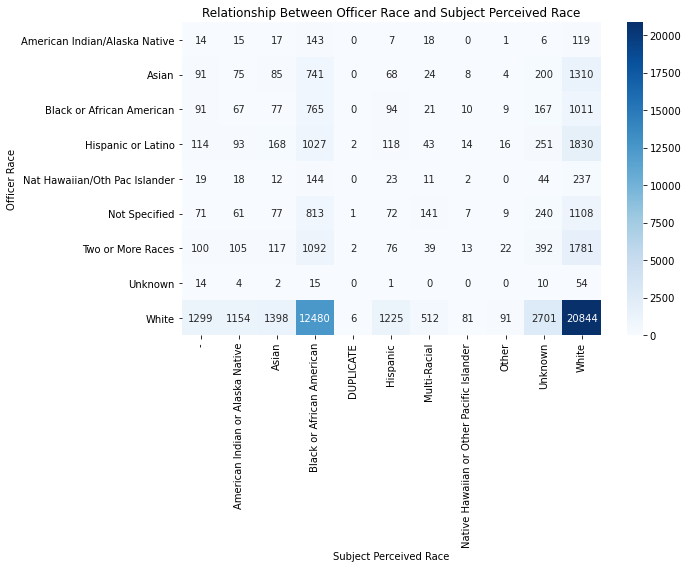

In [12]:
# Create a crosstab to count occurrences
cross_table = pd.crosstab(df['Officer Race'], df['Subject Perceived Race'])

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_table, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Subject Perceived Race")
plt.ylabel("Officer Race")
plt.title("Relationship Between Officer Race and Subject Perceived Race")

# Show the plot
plt.tight_layout()
plt.show()


In [13]:
def label_encoder(df, column_name):
    le = LabelEncoder()
    df[column_name] = le.fit_transform(df[column_name])

# List of columns to label encode
label_list = ["Weapon Type", "Officer Gender", "Officer Race", "Subject Perceived Race", "Subject Perceived Gender", "Arrest Flag", "Frisk Flag"]

# Apply label encoding to each column
for label in label_list:
    label_encoder(df, label)

# Display the transformed data
df.head()


,Subject ID,Weapon Type,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Time,Arrest Flag,Frisk Flag
0,-1,15,1,8,10,2,16:20:00.0000000,0,1
1,-1,15,1,8,3,4,19:23:00.0000000,0,1
2,-1,13,1,8,3,4,19:38:00.0000000,0,2
3,-1,15,0,8,10,4,10:08:00.0000000,0,1
4,-1,15,1,8,10,2,14:43:00.0000000,0,1


In [14]:
df.shape

(57674, 9)

In [15]:
# Convert 'Reported Time' to the number of seconds since midnight
df['Reported Time'] = pd.to_datetime(df['Reported Time'], format='%H:%M:%S.%f').dt.hour * 3600 + pd.to_datetime(df['Reported Time'], format='%H:%M:%S.%f').dt.minute * 60 + pd.to_datetime(df['Reported Time'], format='%H:%M:%S.%f').dt.second

# Now we have 'Reported Time' in a numerical format


In [16]:
# Specify the features and target variable
# We want to predict the Arrest Flag.
X = df.drop('Arrest Flag', axis=1)
y = df['Arrest Flag']

In [17]:
# Split the data into a training set and a testing set
# The test_size parameter controls the ratio of the test set (here, 0.2 means we use 20% of the data for testing)
# The random_state parameter ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# You can check the shape of the resulting sets to ensure the split is correct
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (46139, 8)
X_test shape: (11535, 8)
y_train shape: (46139,)
y_test shape: (11535,)


Standardize the data

We will perform feature scaling to rescale data to have a mean of 0 and standard deviation of 1 (unit variance)

In [18]:
#Feature Scaling 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [19]:
# Create and train a Logistic Regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [20]:
# Create and train a classifier (you can replace DecisionTreeClassifier with another algorithm)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = clf.predict(X_train)

# Make predictions on the testing set
y_test_pred = clf.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.8579973992197659


A training accuracy of 100% might indicate that the model has overfitted the training data, meaning it has learned the training data very well but may not generalize as effectively to unseen data. The testing accuracy is still quite good, indicating that the model is performing well on data it hasn't seen before. However, it's important to consider other evaluation metrics and possibly tune the model to achieve a better balance between training and testing accuracy.

# Implement Classification Models


We will build three models and compare their accuracy scores.

In [21]:
 #To store results of models, we create two dictionaries 
result_dict_train = {} 
result_dict_test = {}

# 1. Logistic Regression

In [22]:
reg = LogisticRegression(random_state=42)
accuracies = cross_val_score(reg, X_train, y_train, cv=5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Obtain accuracy
print("Train Score:", np.mean(accuracies))
print("Test Score:", reg.score(X_test, y_test))

Train Score: 0.8969201668704795
Test Score: 0.8970957954052883


In [23]:
 #Store results in the dictionaries 
result_dict_train["Logistic Train Score"] = np.mean(accuracies) 
result_dict_test["Logistic Test Score"] = reg.score(X_test,y_test)

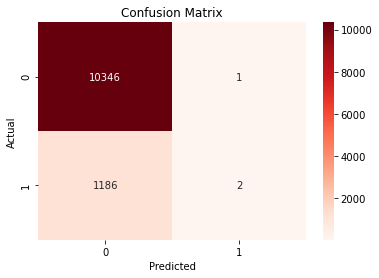

In [24]:
# Visualize the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 2. KNN Classifier

In [25]:
knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, X_train, y_train, cv=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Obtain accuracy
print("Train Score:", np.mean(accuracies))
print("Test Score:", knn.score(X_test, y_test))

Train Score: 0.8778690570431127
Test Score: 0.881751192024274


In [26]:
neighbors = np.arange(1,30)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

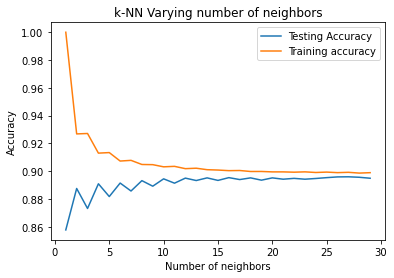

In [27]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

We can observe above that we get maximum testing accuracy for k=10. So lets create a KNeighborsClassifier with number of neighbors as 10.

In [28]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=20)

In [29]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [30]:
knn.score(X_test,y_test)

0.89518855656697

# KNN Model 2

KNNS with nans replaced

In [31]:
# It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values
df[["Weapon Type", "Officer Gender", "Officer Race", "Subject Perceived Race", "Subject Perceived Gender", "Arrest Flag", "Frisk Flag"]] = df[["Weapon Type", "Officer Gender", "Officer Race", "Subject Perceived Race", "Subject Perceived Gender", "Arrest Flag", "Frisk Flag"]].replace(0,np.NaN)

## showing the count of Nans
print(df.isna().sum())

Subject ID                      0
Weapon Type                 21496
Officer Gender               6552
Officer Race                  340
Subject Perceived Race       1813
Subject Perceived Gender      240
Reported Time                   0
Arrest Flag                 51752
Frisk Flag                    478
dtype: int64


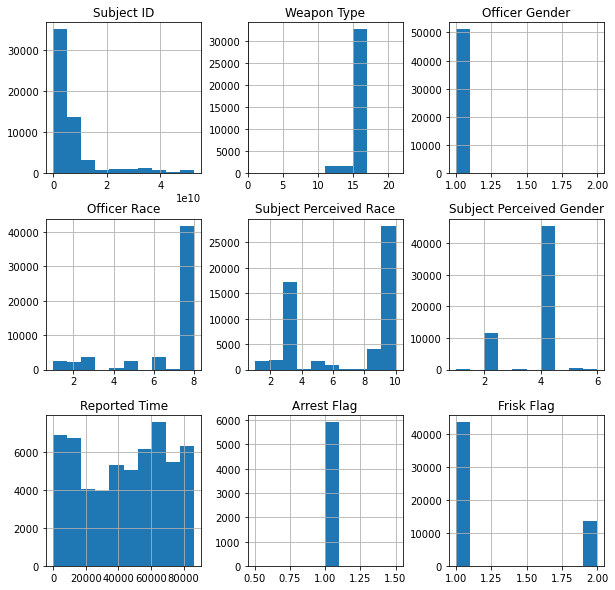

In [32]:
p = df.hist(figsize = (10,10))

In [33]:
# Normal distribution replace with mean
# Skewed distribution replace with median


df['Weapon Type'].fillna(df['Weapon Type'].mean(), inplace = True)
df['Officer Gender'].fillna(df['Officer Gender'].mean(), inplace = True)
df['Officer Race'].fillna(df['Officer Race'].mean(), inplace = True)
df['Subject Perceived Race'].fillna(df['Subject Perceived Race'].median(), inplace = True)
df['Subject Perceived Gender'].fillna(df['Subject Perceived Gender'].median(), inplace = True)
df['Arrest Flag'].fillna(df['Arrest Flag'].mean(), inplace = True)
df['Frisk Flag'].fillna(df['Frisk Flag'].median(), inplace = True)

Ploting after nan removal

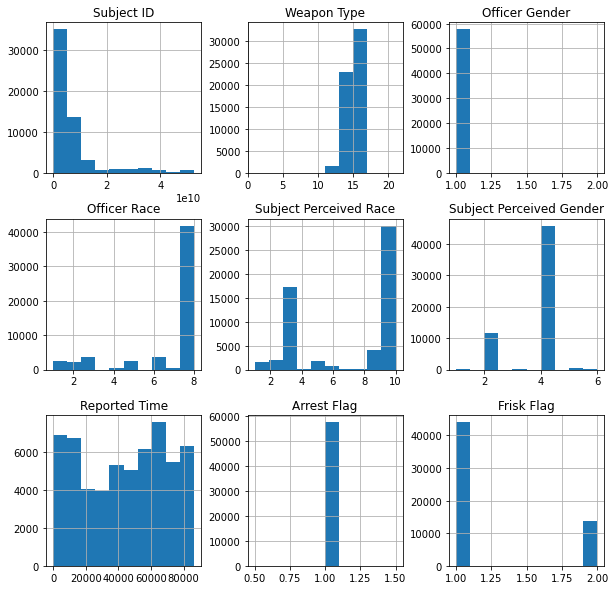

In [34]:
p=df.hist(figsize = (10,10))

Scale the data

In [35]:
# Create a StandardScaler instance
scale_x = StandardScaler()

# Scale the data, excluding the target variable 'Subject Perceived Race'
scaled_data = scale_x.fit_transform(df.drop(["Subject Perceived Race"], axis=1))

# Extract the column names
column_names = df.columns[:-1]  # Exclude the 'Subject Perceived Race' column

# Create a DataFrame with scaled data
scaled_df = pd.DataFrame(scaled_data, columns=column_names)

# Add the 'Arrest Flag' column to the scaled DataFrame
scaled_df['Subject Perceived Race'] = df['Subject Perceived Race']

# Check the shape of the scaled DataFrame
print("Shape of scaled DataFrame:", scaled_df.shape)


Shape of scaled DataFrame: (57674, 8)


In [36]:
scaled_df.head()

,Subject ID,Weapon Type,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Time,Arrest Flag
0,-0.569384,0.322176,-0.025738,0.548464,10.0,0.571055,0.0,-0.55592
1,-0.569384,0.322176,-0.025738,0.548464,3.0,0.992381,0.0,-0.55592
2,-0.569384,-1.715889,-0.025738,0.548464,3.0,1.026916,0.0,1.79882
3,-0.569384,0.322176,0.000000,0.548464,10.0,-0.285413,0.0,-0.55592
4,-0.569384,0.322176,-0.025738,0.548464,10.0,0.347728,0.0,-0.55592


In [37]:
y = df["Subject Perceived Race"]

In [38]:
# modeling 
test_scores = []
train_scores = []

for i in range(5,20):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

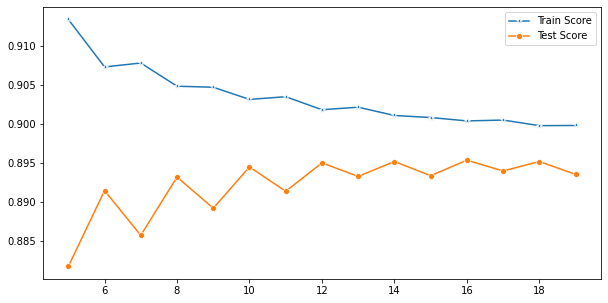

In [39]:
plt.figure(figsize=(10,5))
p = sns.lineplot(x=range(5,20),y=train_scores,marker='*',label='Train Score')
p = sns.lineplot(x=range(5,20),y=test_scores,marker='o',label='Test Score')

In [40]:
knn = KNeighborsClassifier(16)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8953619419159081

# 3. Decision Trees Model

In [41]:
dst_R_model = DecisionTreeRegressor(max_depth=8)

In [42]:
dst_R_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8)

In [43]:
y_pred = dst_R_model.predict(X_test)

In [44]:
dst_R_model.score(X_test,y_test)

0.19319068838104314

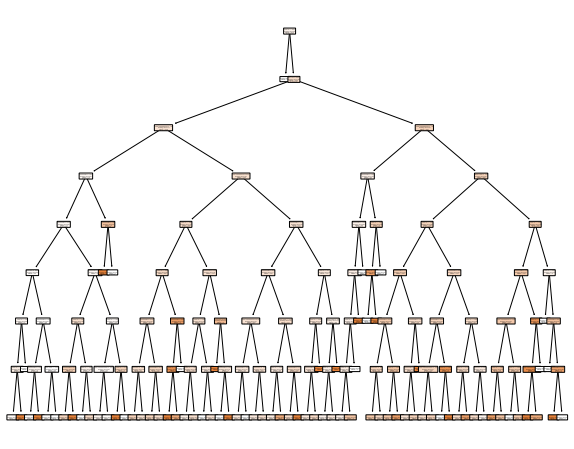

In [45]:
plt.figure(figsize=(10, 8))
plot_tree(dst_R_model, filled=True, feature_names=scaled_df.columns.to_list(), rounded=True)
plt.show()

# CONCLUSION

From the three models, we can see that the scaled KNN model 2 provides the highest accuracy test:

- **KNN Model with k=16:** The KNN model was configured with a value of `k=16`, which means that it considers the 16 nearest neighbors when making a classification decision.

- **Accuracy Score:** The accuracy score obtained for this KNN model is approximately 89.54%. This score represents how many of the test data points were correctly classified by the model.

Here's an analysis based on the score we got:

- The KNN model, with `k=16`, achieved a relatively high accuracy score, indicating that it performs well in classifying the test data.

- An accuracy of around 89.54% suggests that the model correctly predicted the class labels for a substantial portion of the test data.

- A higher value of `k` tends to make the model more robust and can help reduce the impact of noise or outliers in the data.

This shows that with the Terry Stops, there is a high likelihood for a suspect to be stopped based on there race i.e there is a likelihood to be stoppe if you are Not white.